# Keras Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
!pip install folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kc_house_data.csv")

In [ ]:
from matplotlib import style
style.use('dark_background')

In [ ]:
#df = pd.read_csv("kc_house_data.csv")

## Exploratory Data Analysis and Visualization

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


### İd_number

In [ ]:
df = df.drop('id', axis = 1)

### price

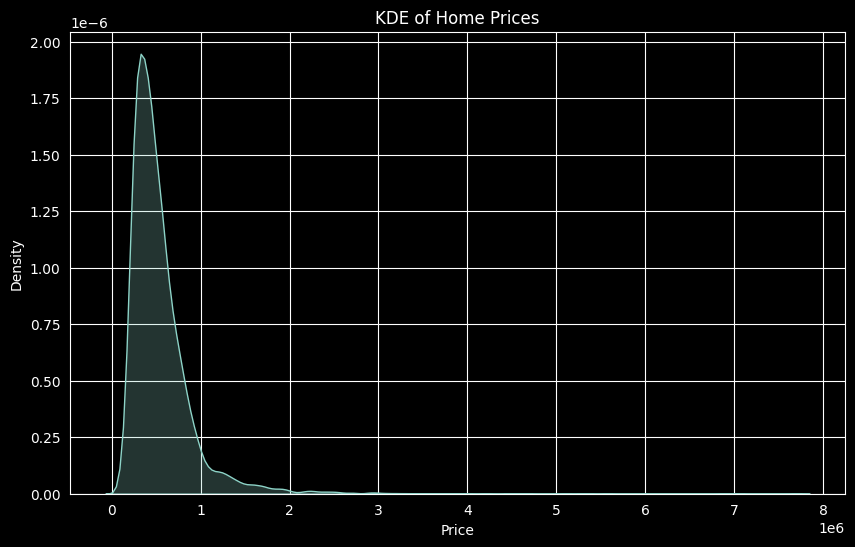

In [ ]:
sns.kdeplot(df['price'], shade = True)  # `shade=True` fills the area under the curve
plt.title('KDE of Home Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


In [ ]:
df[df["price"] > 3000000].sort_values(by="price", ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,4,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,3,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,3,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,3,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime

<Axes: >

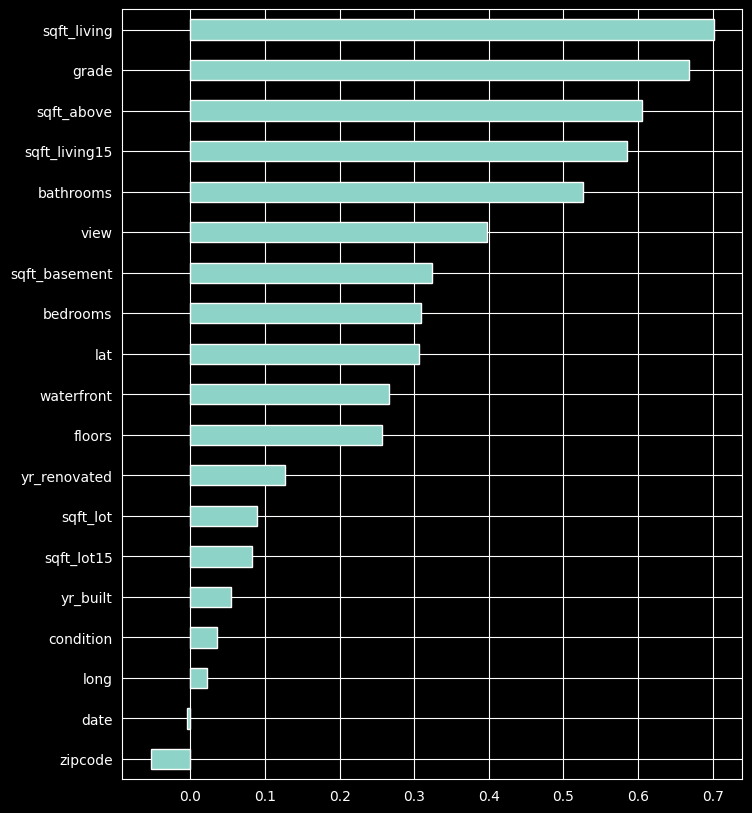

In [ ]:
plt.figure(figsize = (8,10))
df.corr()["price"].sort_values().drop("price").plot(kind = "barh")

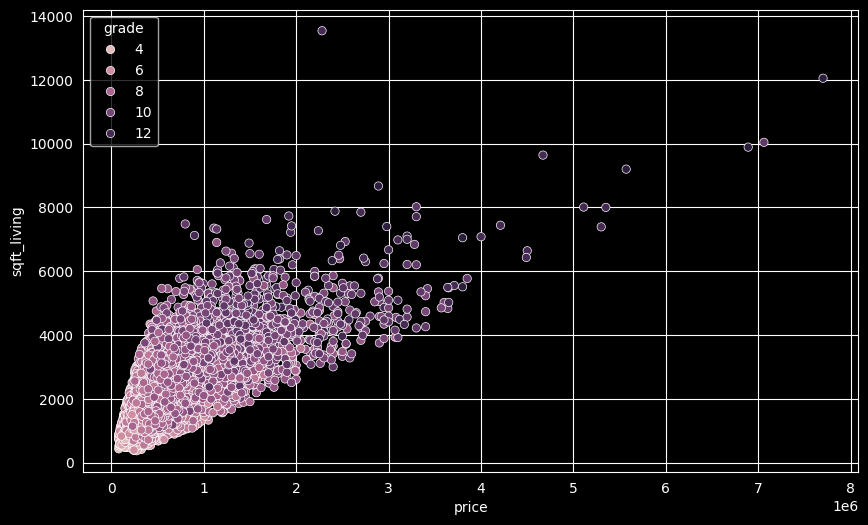

In [ ]:
sns.scatterplot(x = 'price',y = 'sqft_living', data = df, hue = "grade");

### bedrooms

<Axes: xlabel='bedrooms', ylabel='count'>

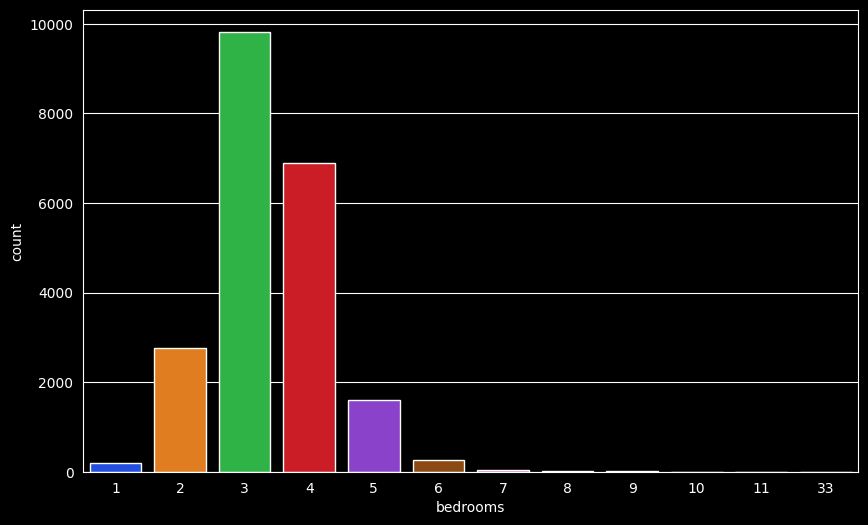

In [ ]:
sns.countplot(x='bedrooms', data=df, palette='bright')

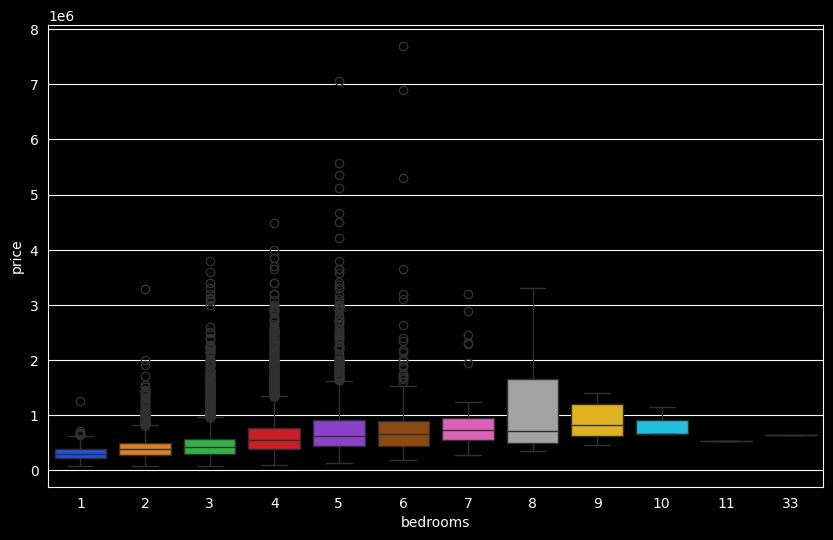

In [ ]:
sns.boxplot(x = 'bedrooms', y = 'price', data = df, palette='bright');

In [ ]:
df[df["bedrooms"] > 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,2014-08-21,520000.000,11,3.000,3000,4960,2.000,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960
15856,2014-06-25,640000.000,33,1.750,1620,6000,1.000,0,0,5,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700


In [ ]:
df = df[df["bedrooms"] != 33]

Most likely the data was entered incorrectly.

In [ ]:
df.shape

(21596, 20)

### date

In [ ]:
df['date'].dtype

dtype('<M8[ns]')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date']

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18
...,...
21592,2014-05-21
21593,2015-02-23
21594,2014-06-23
21595,2015-01-16


In [ ]:
df['year'] = df['date'].dt.year


In [ ]:
df['month'] = df['date'].dt.month

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2


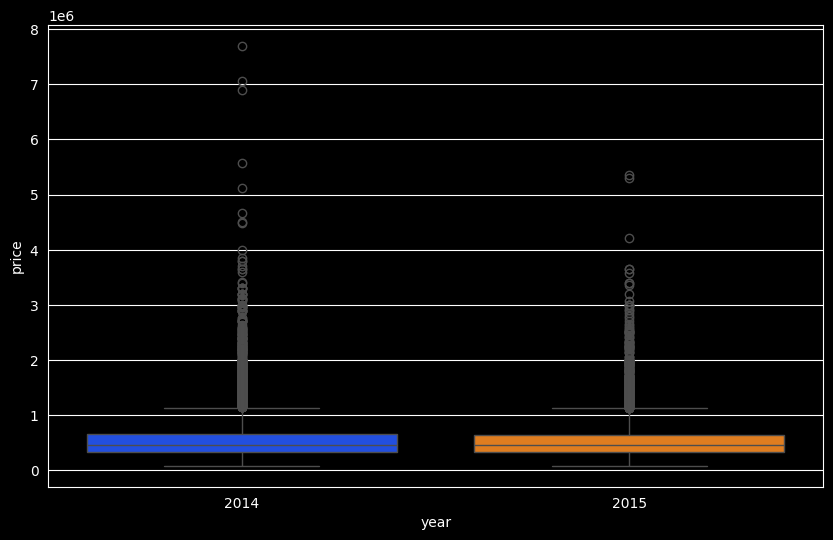

In [ ]:
sns.boxplot(x = 'year', y = 'price', data = df, palette='bright');

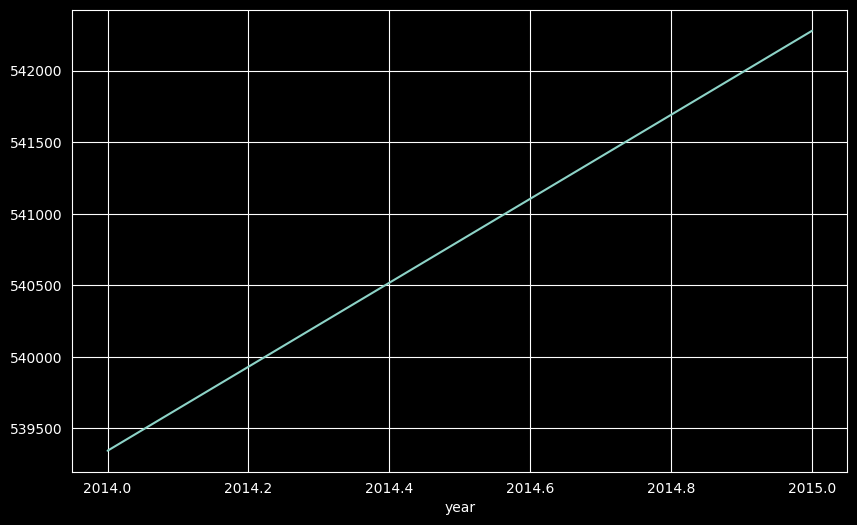

In [ ]:
df.groupby('year')['price'].mean().plot();

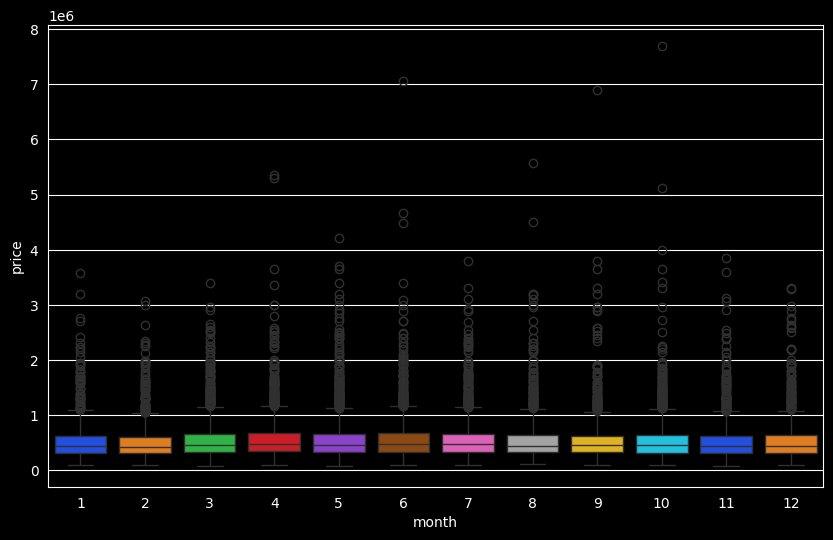

In [ ]:
sns.boxplot(x = 'month', y = 'price', data = df, palette='bright');

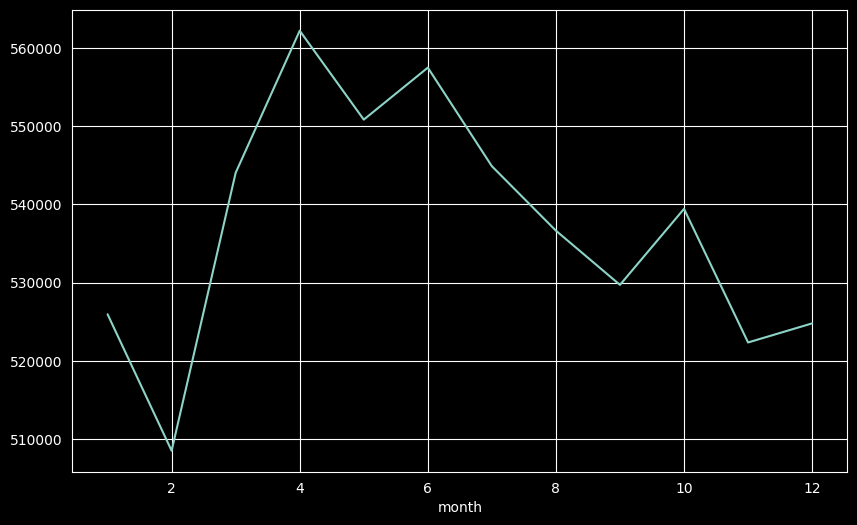

In [ ]:
df.groupby('month')['price'].mean().plot();

In [ ]:
 month_dummy = pd.get_dummies(df["month"], prefix = "month")
 df = pd.concat([df, month_dummy], axis = 1)
 df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10,False,False,False,False,False,False,False,False,False,True,False,False
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12,False,False,False,False,False,False,False,False,False,False,False,True
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2,False,True,False,False,False,False,False,False,False,False,False,False
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12,False,False,False,False,False,False,False,False,False,False,False,True
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = df.drop(['date', "year", "month"], axis = 1)

### zipcode

In [ ]:
df['zipcode'].value_counts(dropna = False)

,count
zipcode,
98103,601
98038,589
98115,583
98052,574
98117,553
...,...
98102,104
98010,100
98024,80


we can categorize the zipcodes as north, south, west, east, middle by regions. But it can be made manually and taken many time and we need domain knowladge to do that. So we will drop this column.

In [ ]:
df = df.drop('zipcode', axis = 1)

### yr_renovated & yr_built

In [ ]:
df['yr_renovated'].value_counts(dropna = False)

,count
yr_renovated,
0,20682
2014,91
2013,37
2003,36
2005,35
...,...
1951,1
1959,1
1948,1


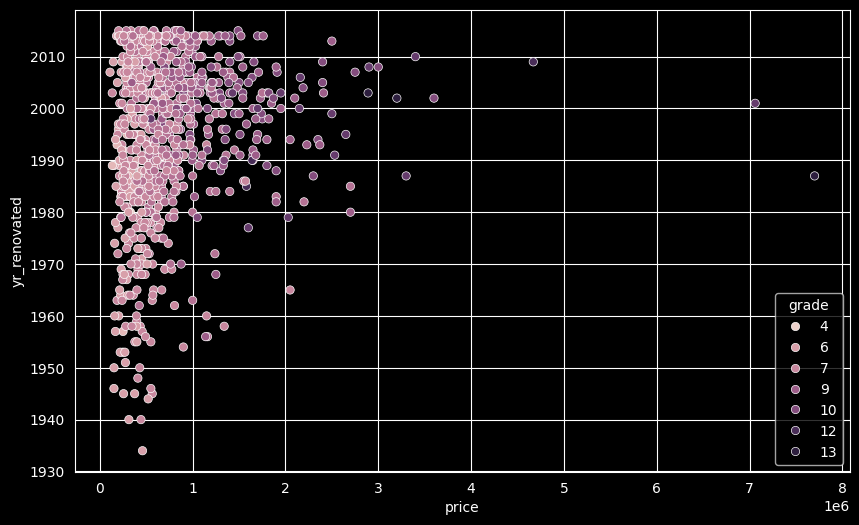

In [ ]:
sns.scatterplot(x = 'price',y = 'yr_renovated', data = df[df.yr_renovated!=0], hue = "grade");

In [ ]:
df['yr_built'].value_counts(dropna = False)

,count
yr_built,
2014,559
2006,453
2005,450
2004,433
2003,420
...,...
1933,30
1901,29
1902,27


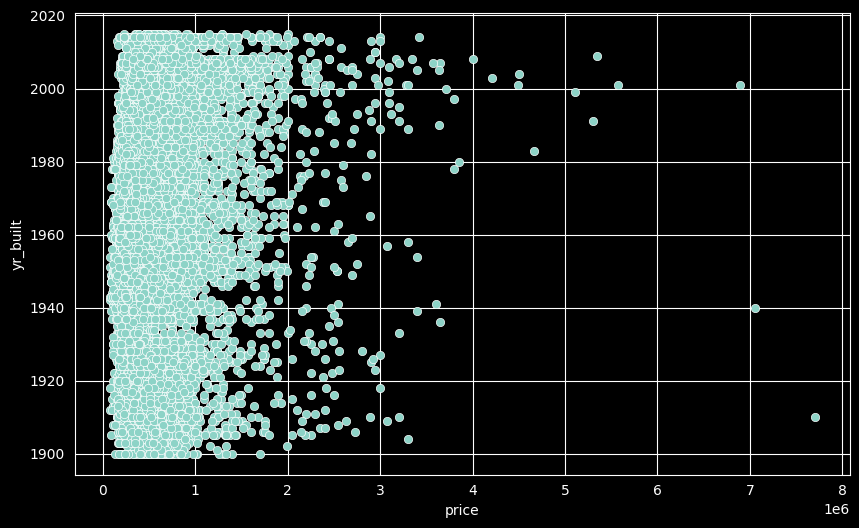

In [ ]:
sns.scatterplot(x = 'price',y = 'yr_built', data = df);

In [ ]:
df.yr_renovated.apply(lambda x : x if x == 0 else 1).value_counts()

,count
yr_renovated,
0,20682
1,914


In [ ]:
df["renovated"] = df.yr_renovated.apply(lambda x : x if x == 0 else 1)

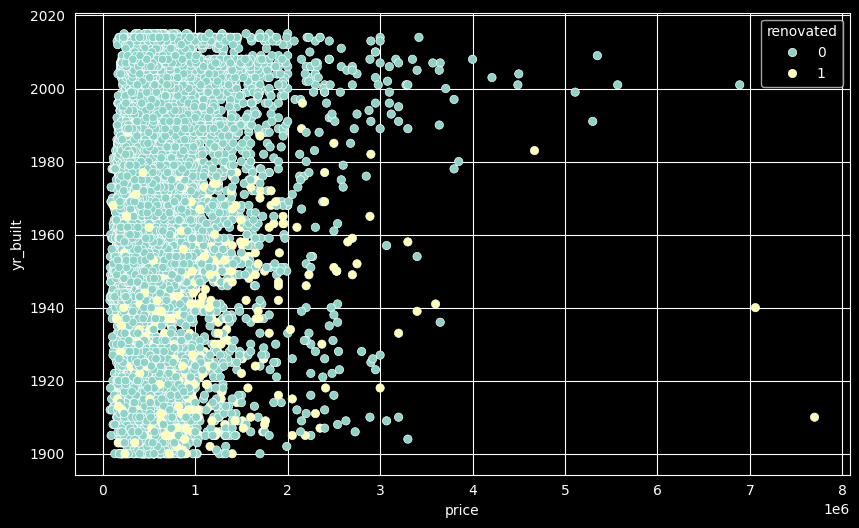

In [ ]:
sns.scatterplot(x = 'price',y = 'yr_built', data = df, hue = "renovated");

In [ ]:
df["built|renovated"] = df["yr_renovated"].replace(0, np.nan).fillna(df["yr_built"])
df["built|renovated"]

,built|renovated
0,1955.000
1,1991.000
2,1933.000
3,1965.000
4,1987.000
...,...
21592,2009.000
21593,2014.000
21594,2009.000
21595,2004.000


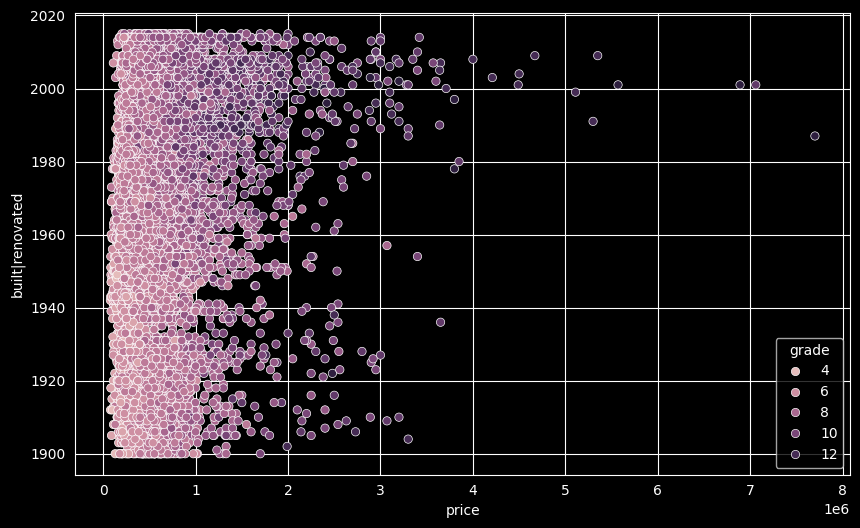

In [ ]:
sns.scatterplot(x = 'price',y = 'built|renovated', data = df, hue = "grade");

In [ ]:
df.drop(["yr_renovated", "yr_built", "renovated"], axis = 1, inplace = True)

could make sense due to scaling, higher should correlate to more value

### sqft_basement

<Axes: xlabel='sqft_basement', ylabel='Density'>

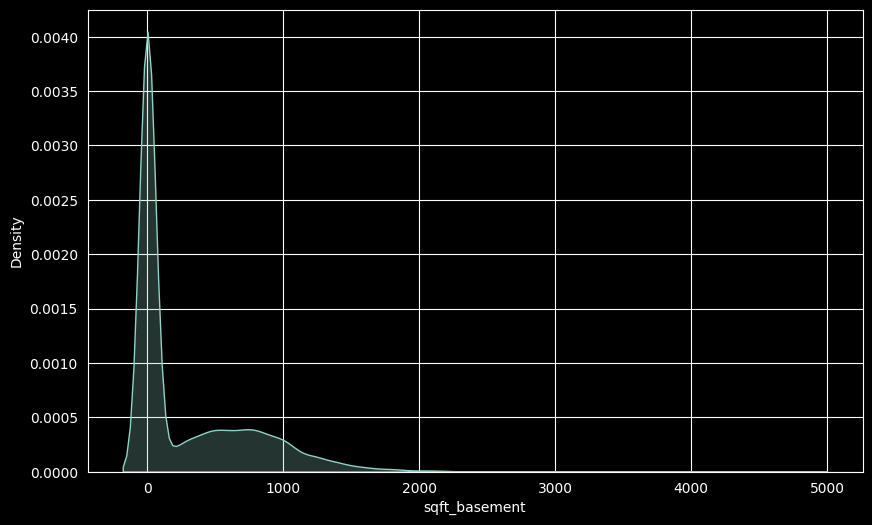

In [ ]:
sns.kdeplot(df['sqft_basement'], shade = True)

In [ ]:
df[df["sqft_basement"] > 3000].sort_values(by="sqft_basement", ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,built|renovated
8085,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,47.557,-122.210,3270,10454,False,False,False,False,False,True,False,False,False,False,False,False,2009.000
12764,2280000.000,7,8.000,13540,307752,3.000,0,4,3,12,9410,4130,47.667,-121.986,4850,217800,False,False,False,False,True,False,False,False,False,False,False,False,1999.000
15468,3200000.000,4,3.250,7000,28206,1.000,1,4,4,12,3500,3500,47.593,-122.086,4913,14663,False,False,False,False,False,False,False,True,False,False,False,False,1991.000
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,47.630,-122.323,3940,8800,False,False,False,False,False,False,False,False,False,True,False,False,1987.000
10074,1900000.000,5,4.250,6510,16471,2.000,0,3,4,11,3250,3260,47.576,-122.242,4480,16471,False,False,False,False,False,False,False,False,True,False,False,False,1980.000


could make sense due to scaling, higher should correlate to more value

### sqft_above

<Axes: xlabel='sqft_above', ylabel='Density'>

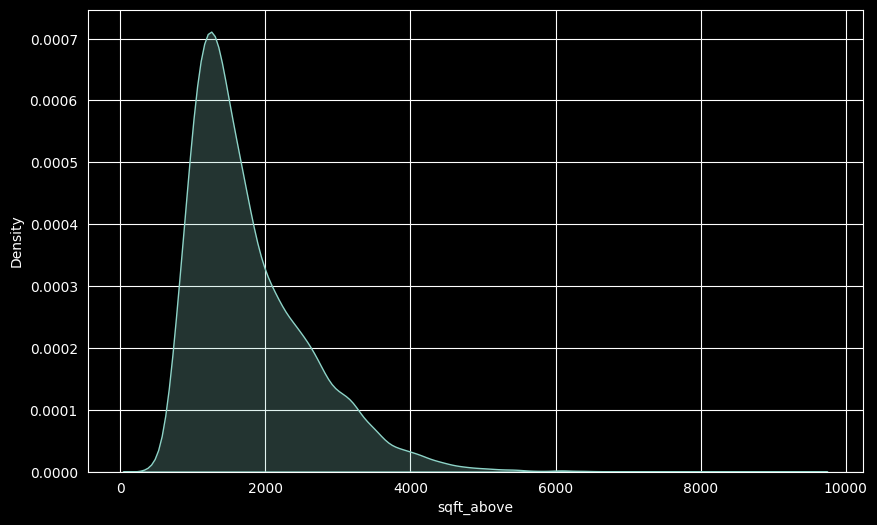

In [ ]:
sns.kdeplot(df['sqft_above'], shade = True)

In [ ]:
df[df["sqft_above"] > 6000].sort_values(by="sqft_above", ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,built|renovated
12764,2280000.000,7,8.000,13540,307752,3.000,0,4,3,12,9410,4130,47.667,-121.986,4850,217800,False,False,False,False,True,False,False,False,False,False,False,False,1999.000
9245,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,47.630,-122.240,4540,42730,False,False,False,False,False,False,False,False,True,False,False,False,2001.000
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,47.630,-122.323,3940,8800,False,False,False,False,False,False,False,False,False,True,False,False,1987.000
18288,3300000.000,5,6.250,8020,21738,2.000,0,0,3,11,8020,0,47.568,-122.189,4160,18969,False,False,False,False,False,False,True,False,False,False,False,False,2001.000
13398,2420000.000,5,4.750,7880,24250,2.000,0,2,3,13,7880,0,47.733,-122.362,2740,10761,True,False,False,False,False,False,False,False,False,False,False,False,1996.000
19842,2700000.000,4,4.000,7850,89651,2.000,0,0,3,12,7850,0,47.541,-121.982,6210,95832,True,False,False,False,False,False,False,False,False,False,False,False,2006.000
3910,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,47.650,-122.214,3930,25449,False,False,False,False,False,True,False,False,False,False,False,False,2001.000
11859,1950000.000,4,3.250,7420,167869,2.000,0,3,3,12,7420,0,47.455,-121.764,5610,169549,True,False,False,False,False,False,False,False,False,False,False,False,2002.000
18579,1140000.000,5,4.000,7320,217800,2.000,0,0,3,11,7320,0,47.447,-122.086,3270,34500,False,False,False,False,False,False,True,False,False,False,False,False,1992.000
1446,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,47.623,-122.220,4600,21750,False,False,False,True,False,False,False,False,False,False,False,False,2009.000


### Geographical Properties

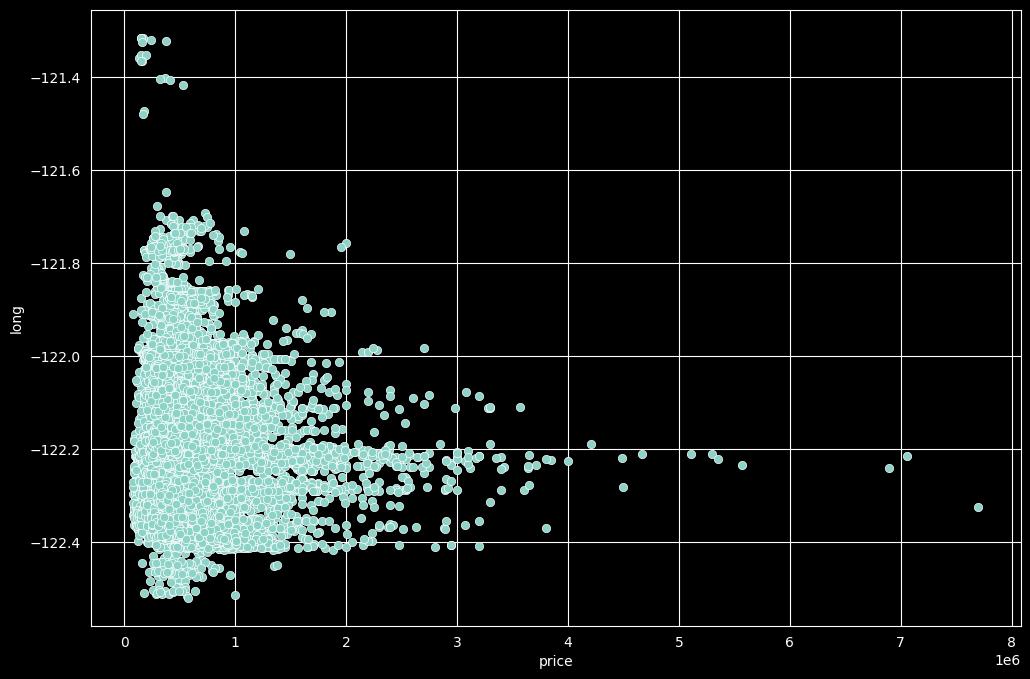

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'price', y = 'long', data = df);

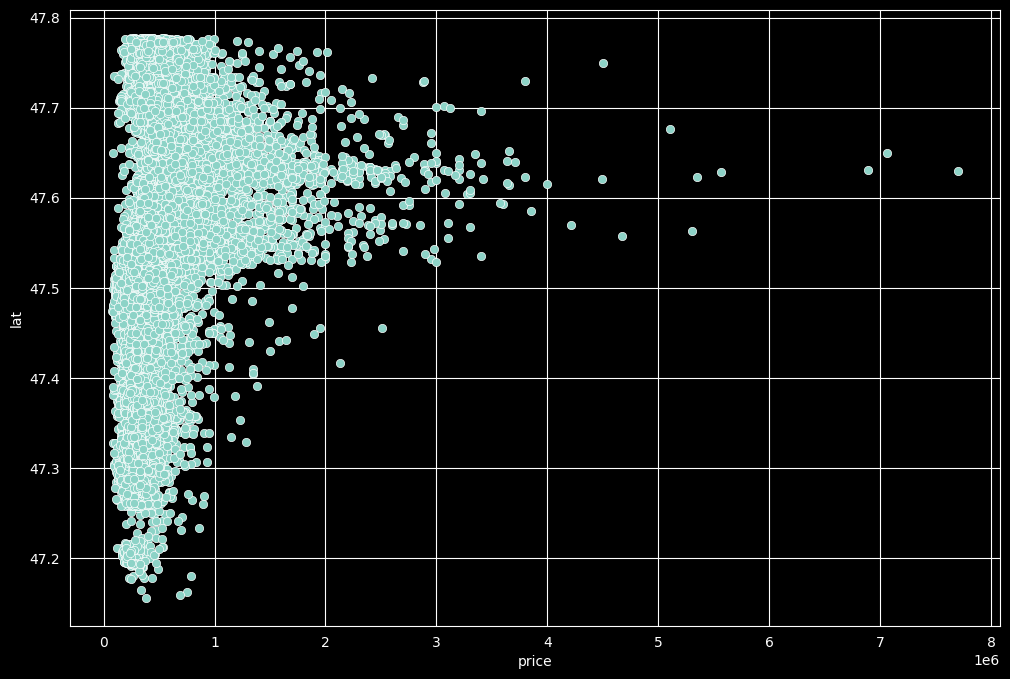

In [ ]:
plt.figure(figsize  = (12, 8))
sns.scatterplot(x = 'price', y = 'lat', data = df);

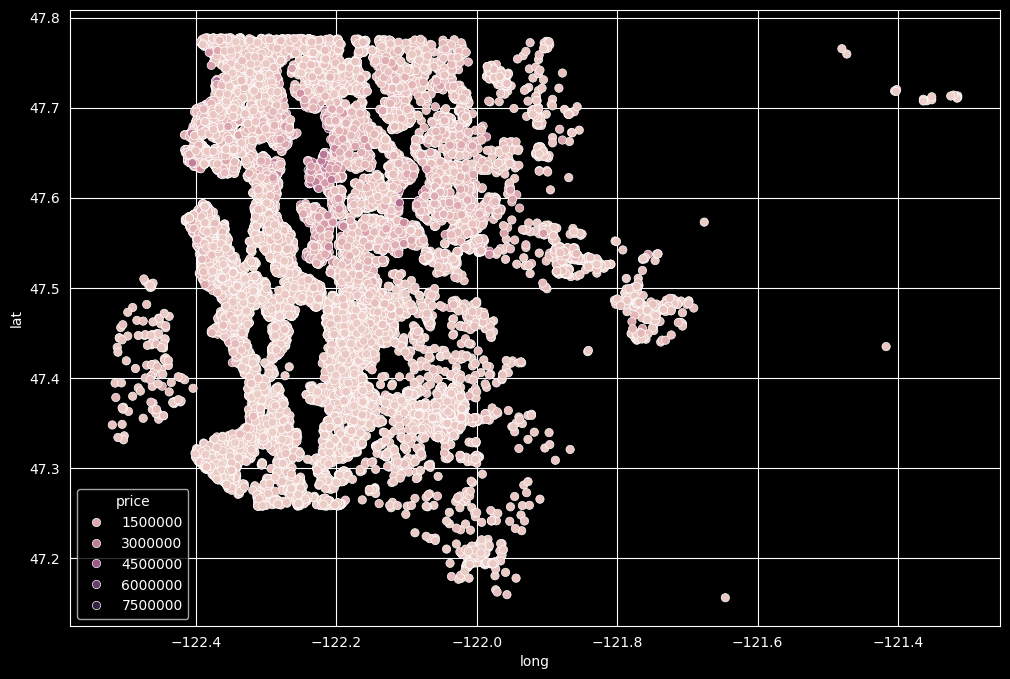

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price');

In [ ]:
len(df) * (0.01)

215.96

In [ ]:
df.sort_values('price', ascending = False).head(216)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,built|renovated
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,47.630,-122.323,3940,8800,False,False,False,False,False,False,False,False,False,True,False,False,1987.000
3910,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,47.650,-122.214,3930,25449,False,False,False,False,False,True,False,False,False,False,False,False,2001.000
9245,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,47.630,-122.240,4540,42730,False,False,False,False,False,False,False,False,True,False,False,False,2001.000
4407,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,47.629,-122.233,3560,24345,False,False,False,False,False,False,False,True,False,False,False,False,2001.000
1446,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,47.623,-122.220,4600,21750,False,False,False,True,False,False,False,False,False,False,False,False,2009.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,1980000.000,6,4.500,4800,9097,2.000,0,0,3,10,3580,1220,47.626,-122.291,2180,6037,False,False,False,False,False,False,True,False,False,False,False,False,2007.000
16511,1980000.000,4,3.500,4500,44384,1.000,0,0,3,12,3340,1160,47.632,-122.192,2540,26287,False,True,False,False,False,False,False,False,False,False,False,False,1990.000
19513,1980000.000,4,4.000,4360,12081,2.000,0,0,3,10,4360,0,47.638,-122.219,2180,10800,False,False,False,False,False,False,False,True,False,False,False,False,2007.000
3278,1970000.000,5,3.750,3940,13738,1.500,0,3,4,9,3940,0,47.620,-122.212,2370,13320,False,True,False,False,False,False,False,False,False,False,False,False,1951.000


In [ ]:
non_top_1_perc = df.sort_values('price', ascending = False).iloc[216:]

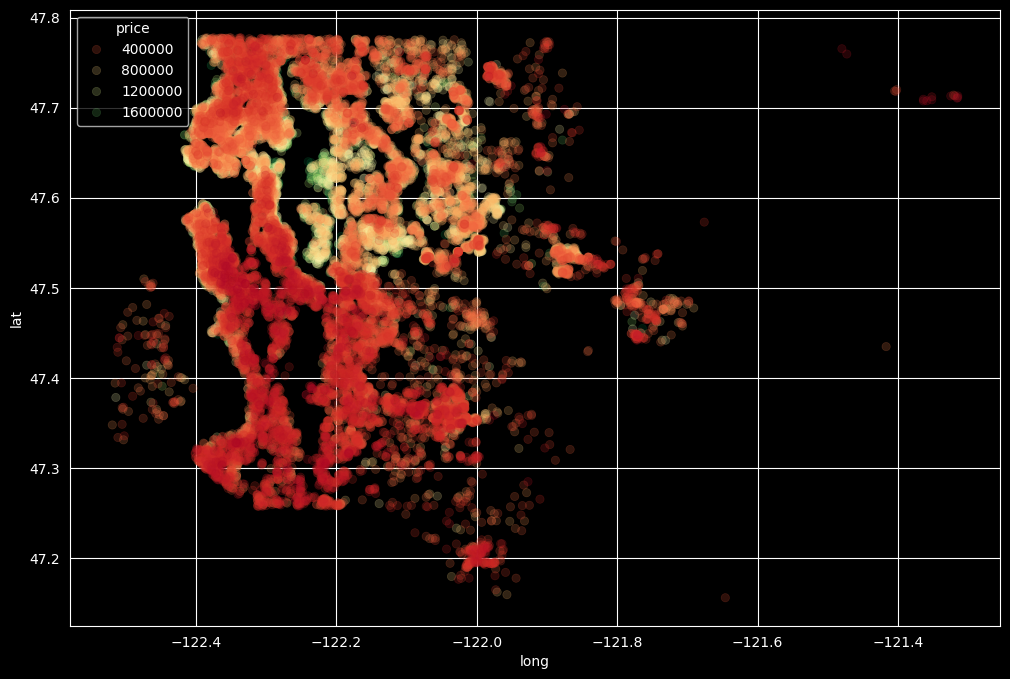

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_perc, hue = 'price',
                palette = 'RdYlGn', edgecolor = None, alpha = 0.2);

In [ ]:
import folium
import branca.colormap as cm

In [ ]:
folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start=10)

In [ ]:
step_1 = df.price.min()
step_2 = df.price.quantile(0.25)
step_3 = df.price.quantile(0.50)
step_4 = df.price.quantile(0.75)
step_5 = df.price.max()

In [ ]:
m = folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start = 10)
colormap = cm.StepColormap(colors=["red","orange","yellow","green"] ,
                           index=[step_1, step_2, step_3, step_4, step_5],
                           vmin=step_1,
                           vmax=step_5)
for loc, p in zip(zip(df['lat'], df['long']),df["price"]):
      folium.Circle(
      location=loc,
      radius=1,
      fill=True,
      color=colormap(p)
      ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

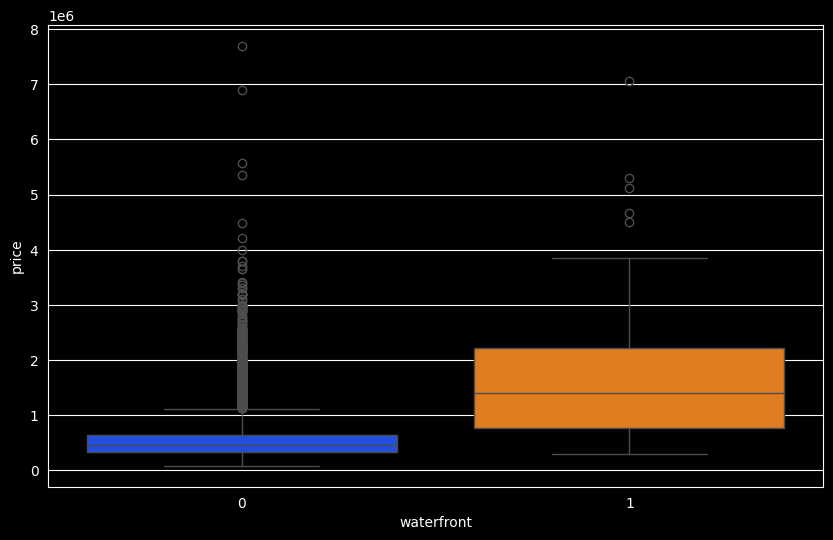

In [ ]:
sns.boxplot(x = 'waterfront', y = 'price', data = df, palette='bright');

In [ ]:
df.groupby("waterfront").price.mean()

,price
waterfront,
0,531757.274
1,1662524.184


### latest data

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,built|renovated
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,47.511,-122.257,1340,5650,False,False,False,False,False,False,False,False,False,True,False,False,1955.000
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,47.721,-122.319,1690,7639,False,False,False,False,False,False,False,False,False,False,False,True,1991.000
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,47.738,-122.233,2720,8062,False,True,False,False,False,False,False,False,False,False,False,False,1933.000
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,47.521,-122.393,1360,5000,False,False,False,False,False,False,False,False,False,False,False,True,1965.000
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,47.617,-122.045,1800,7503,False,True,False,False,False,False,False,False,False,False,False,False,1987.000


In [ ]:
df.shape

(21596, 29)

## Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('price', axis = 1)
y = df['price']

In [ ]:
seed = 101

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [ ]:
#!pip install --upgrade tensorflow

In [ ]:
#!pip install numpy==1.23.5

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [ ]:
X_train.shape

(19436, 28)

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 24)                  │             696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.weights

[<KerasVariable shape=(28, 24), dtype=float32, path=sequential_5/dense_25/kernel>,
 <KerasVariable shape=(24,), dtype=float32, path=sequential_5/dense_25/bias>,
 <KerasVariable shape=(24, 24), dtype=float32, path=sequential_5/dense_26/kernel>,
 <KerasVariable shape=(24,), dtype=float32, path=sequential_5/dense_26/bias>,
 <KerasVariable shape=(24, 12), dtype=float32, path=sequential_5/dense_27/kernel>,
 <KerasVariable shape=(12,), dtype=float32, path=sequential_5/dense_27/bias>,
 <KerasVariable shape=(12, 6), dtype=float32, path=sequential_5/dense_28/kernel>,
 <KerasVariable shape=(6,), dtype=float32, path=sequential_5/dense_28/bias>,
 <KerasVariable shape=(6, 1), dtype=float32, path=sequential_5/dense_29/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_5/dense_29/bias>]

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 250)

Epoch 1/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 439280730112.0000 - val_loss: 424005074944.0000
Epoch 2/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 439141924864.0000 - val_loss: 422619774976.0000
Epoch 3/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 435999997952.0000 - val_loss: 409810436096.0000
Epoch 4/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 415622955008.0000 - val_loss: 360153350144.0000
Epoch 5/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 350172413952.0000 - val_loss: 254255284224.0000
Epoch 6/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 232168833024.0000 - val_loss: 143414657024.0000
Epoch 7/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 131719208960.0000 - val_loss: 107619352576.0000
Epoch 8/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104657592320.0000 - val_loss: 105150283776.0000
Epoch 9/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 101936635904.0000 - val_loss: 104175525888.0000
Epoch 10/250
130/13

In [ ]:
model.weights

[<KerasVariable shape=(28, 24), dtype=float32, path=sequential_5/dense_25/kernel>,
 <KerasVariable shape=(24,), dtype=float32, path=sequential_5/dense_25/bias>,
 <KerasVariable shape=(24, 24), dtype=float32, path=sequential_5/dense_26/kernel>,
 <KerasVariable shape=(24,), dtype=float32, path=sequential_5/dense_26/bias>,
 <KerasVariable shape=(24, 12), dtype=float32, path=sequential_5/dense_27/kernel>,
 <KerasVariable shape=(12,), dtype=float32, path=sequential_5/dense_27/bias>,
 <KerasVariable shape=(12, 6), dtype=float32, path=sequential_5/dense_28/kernel>,
 <KerasVariable shape=(6,), dtype=float32, path=sequential_5/dense_28/bias>,
 <KerasVariable shape=(6, 1), dtype=float32, path=sequential_5/dense_29/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_5/dense_29/bias>]

In [ ]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,428614352896.000,424005074944.000
1,428225953792.000,422619774976.000
2,422626852864.000,409810436096.000
3,393815228416.000,360153350144.000
4,314756857856.000,254255284224.000
...,...,...
245,32400582656.000,35526234112.000
246,32386336768.000,35504644096.000
247,32372936704.000,35484561408.000
248,32359221248.000,35464286208.000


<Axes: >

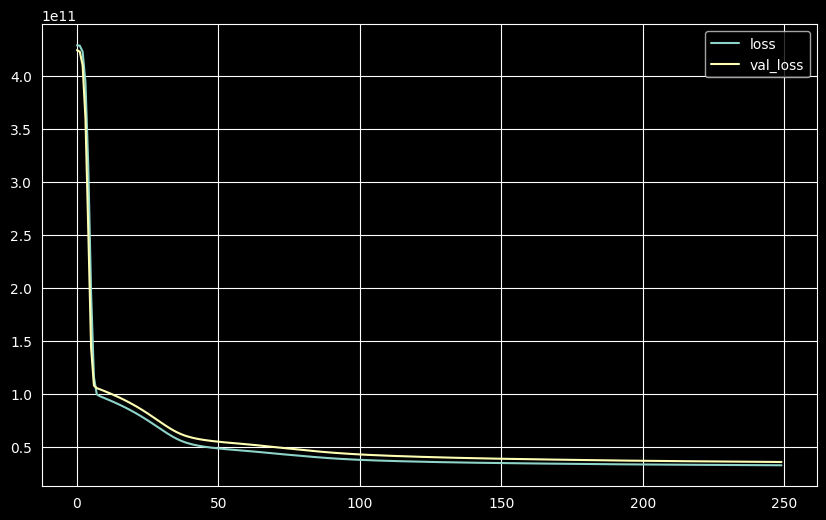

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

29098487808.0

In [ ]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.7735169630470309 
mae: 107202.34967267072 
mse: 29098486670.519127 
rmse: 170582.7853873864


### learning_rate

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate= 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
model.weights

[<KerasVariable shape=(28, 24), dtype=float32, path=sequential_6/dense_30/kernel>,
 <KerasVariable shape=(24,), dtype=float32, path=sequential_6/dense_30/bias>,
 <KerasVariable shape=(24, 24), dtype=float32, path=sequential_6/dense_31/kernel>,
 <KerasVariable shape=(24,), dtype=float32, path=sequential_6/dense_31/bias>,
 <KerasVariable shape=(24, 12), dtype=float32, path=sequential_6/dense_32/kernel>,
 <KerasVariable shape=(12,), dtype=float32, path=sequential_6/dense_32/bias>,
 <KerasVariable shape=(12, 6), dtype=float32, path=sequential_6/dense_33/kernel>,
 <KerasVariable shape=(6,), dtype=float32, path=sequential_6/dense_33/bias>,
 <KerasVariable shape=(6, 1), dtype=float32, path=sequential_6/dense_34/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_6/dense_34/bias>]

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 250)

Epoch 1/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 439171547136.0000 - val_loss: 419387375616.0000
Epoch 2/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 412317876224.0000 - val_loss: 215464968192.0000
Epoch 3/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 157411459072.0000 - val_loss: 104477458432.0000
Epoch 4/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 100420509696.0000 - val_loss: 101021474816.0000
Epoch 5/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 96742383616.0000 - val_loss: 97479598080.0000
Epoch 6/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92948463616.0000 - val_loss: 93717790720.0000
Epoch 7/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88930885632.0000 - val_loss: 89651593216.0000
Epoch 8/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 84606058496.0000 - val_loss: 85214568448.0000
Epoch 9/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79916097536.0000 - val_loss: 80382083072.0000
Epoch 10/250
130/130 ━━━━━━━━

<Axes: >

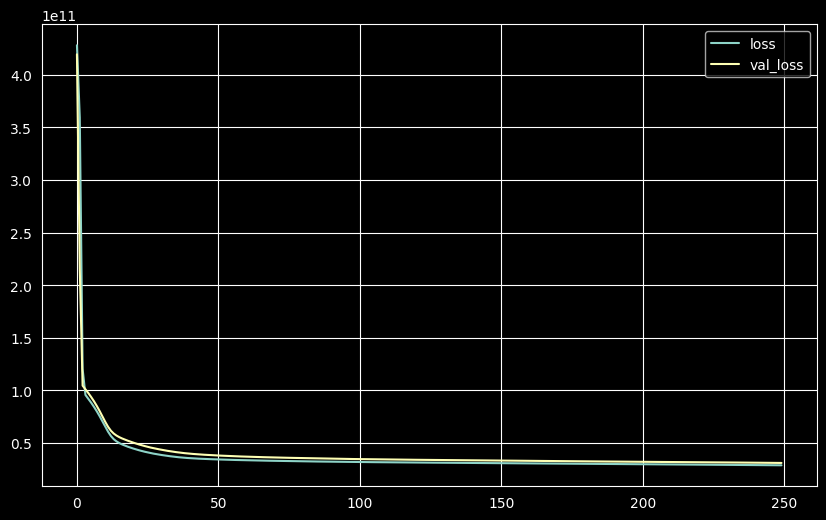

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.7969911923286189 
mae: 101125.69518229166 
mse: 26082523280.76273 
rmse: 161500.84606825665


### EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 250, callbacks = [early_stop])

Epoch 1/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 438947872768.0000 - val_loss: 409044418560.0000
Epoch 2/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 363508269056.0000 - val_loss: 106421157888.0000
Epoch 3/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 102475743232.0000 - val_loss: 101876318208.0000
Epoch 4/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97410318336.0000 - val_loss: 97270136832.0000
Epoch 5/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92463292416.0000 - val_loss: 92324438016.0000
Epoch 6/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 87160528896.0000 - val_loss: 86854688768.0000
Epoch 7/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81326514176.0000 - val_loss: 80750084096.0000
Epoch 8/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 74893754368.0000 - val_loss: 74120110080.0000
Epoch 9/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 68093784064.0000 - val_loss: 67624624128.0000
Epoch 10/250
130/130 ━━━━━━━━━━

<Axes: >

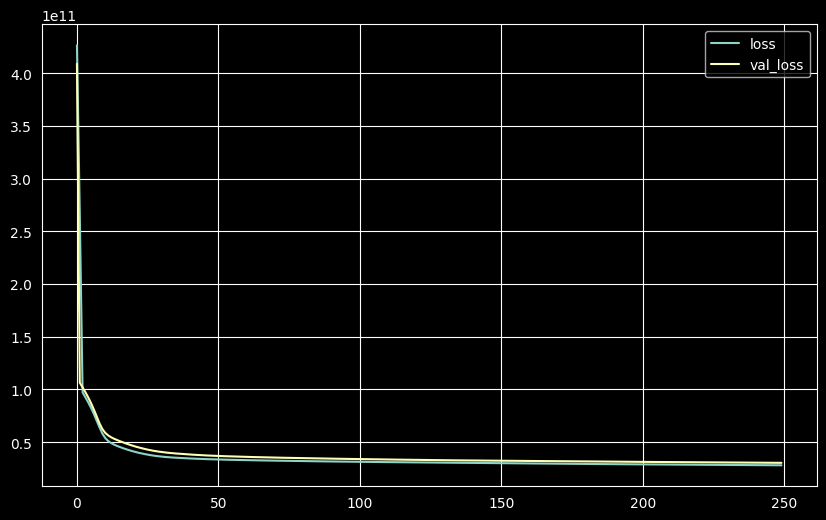

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.8036243859176014 
mae: 99139.33581814237 
mse: 25230292147.567265 
rmse: 158840.46130494354


### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

Dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

For each hidden layer, for each training sample, for each iteration, ignore (zero out) a random fraction, p, of nodes (and corresponding activations).

![dropout.PNG](https://miro.medium.com/max/1400/1*nty4xtm9UBuWLqxHVaamjw.png)
[Source-1](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)
[Source-2](https://medium.com/unpackai/introduction-of-dropout-and-ensemble-model-in-the-history-of-deep-learning-a4c2a512dcca)

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 250, callbacks = [early_stop])

Epoch 1/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 438939713536.0000 - val_loss: 408354455552.0000
Epoch 2/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 355741237248.0000 - val_loss: 106802298880.0000
Epoch 3/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 132477837312.0000 - val_loss: 102935494656.0000
Epoch 4/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130010095616.0000 - val_loss: 99345752064.0000
Epoch 5/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 124943851520.0000 - val_loss: 93182164992.0000
Epoch 6/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 119027253248.0000 - val_loss: 87026638848.0000
Epoch 7/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 111908601856.0000 - val_loss: 81226776576.0000
Epoch 8/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109911826432.0000 - val_loss: 74654941184.0000
Epoch 9/250
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 102158655488.0000 - val_loss: 70231891968.0000
Epoch 10/250
130/130 ━━━━

<Axes: >

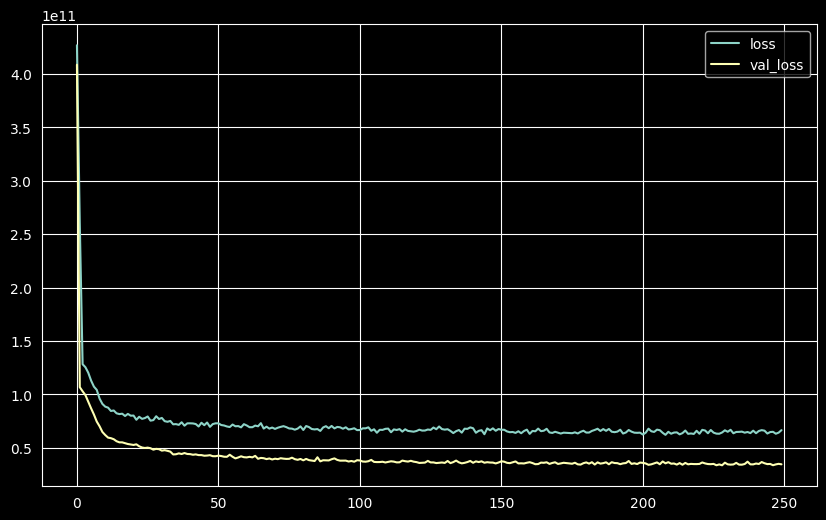

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.7791857156742749 
mae: 103608.0267795139 
mse: 28370166682.490257 
rmse: 168434.45812092684


## Saving Final Model and Scaler

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_kc_house", 'wb'))

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 100, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 375,
         callbacks = [early_stop]
         )

Epoch 1/375
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 423746863104.0000 - val_loss: 408928550912.0000
Epoch 2/375
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 378150617088.0000 - val_loss: 129661411328.0000
Epoch 3/375
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 107649441792.0000 - val_loss: 90999717888.0000
Epoch 4/375
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 93653000192.0000 - val_loss: 87140794368.0000
Epoch 5/375
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89689923584.0000 - val_loss: 83062169600.0000
Epoch 6/375
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 85458870272.0000 - val_loss: 78604410880.0000
Epoch 7/375
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80806961152.0000 - val_loss: 73669394432.0000
Epoch 8/375
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 75672125440.0000 - val_loss: 68322656256.0000
Epoch 9/375
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70126362624.0000 - val_loss: 62693122048.0000
Epoch 10/375
152/152 ━━━━━━━━━━━

<Axes: >

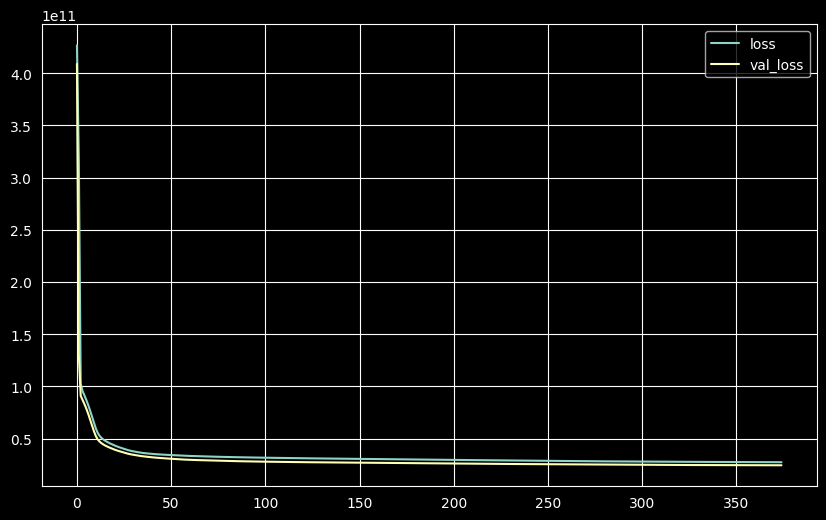

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.8090403610268694 
mae: 98801.8898546007 
mse: 24534448954.871014 
rmse: 156634.76291957355


In [ ]:
model.save('model_kc_house.keras')

## Loading Model and Scaler

In [ ]:
from tensorflow.keras.models import load_model
import pickle

In [ ]:
import os
print(os.listdir())

['.config', 'model_kc_house.keras', 'drive', 'scaler_kc_house', 'sample_data']


In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
pickle.dump(scaler, open("scaler_kc_house", 'wb'))


In [ ]:
model_kc_house = load_model('model_kc_house.keras')
scaler_kc_house = pickle.load(open("scaler_kc_house", "rb"))

In [ ]:
# Check if the scaler has been fitted
if hasattr(scaler_kc_house, 'mean_') and hasattr(scaler_kc_house, 'scale_'):
    print("Scaler loaded successfully!")
    print("Feature means:", scaler_kc_house.mean_)
    print("Feature scales:", scaler_kc_house.scale_)
else:
    print("Scaler has not been fitted. Please fit the scaler before saving it.")

Scaler loaded successfully!
Feature means: [0.23694176 0.21547472 0.12991076 0.00874716 0.19830212 0.00746038
 0.05865404 0.6022587  0.46578    0.15707014 0.06037565 0.65014133
 0.25301958 0.26579749 0.01387771 0.04465939 0.05736777 0.08654044
 0.10310764 0.11190574 0.10166701 0.10295328 0.09065651 0.08170405
 0.08607738 0.0648796  0.06848117 0.63799046]
Feature scales: [0.09071865 0.10255091 0.06988595 0.02459967 0.21624496 0.08605071
 0.19170107 0.16268258 0.11727471 0.09176387 0.09169625 0.22287396
 0.11648097 0.11944921 0.03137899 0.20655492 0.232544   0.28116044
 0.30409941 0.31525045 0.30220991 0.30389785 0.28712003 0.27391331
 0.28047828 0.2463133  0.25256979 0.25092163]


## Prediction

In [ ]:
single_house = df.drop('price', axis = 1).iloc[0:1, :]
single_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,built|renovated
0,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,47.511,-122.257,1340,5650,False,False,False,False,False,False,False,False,False,True,False,False,1955.000


In [ ]:
print(scaler_kc_house.mean_)  # Should print the mean of the data it was fitted on
print(scaler_kc_house.scale_)  # Should print the scale (standard deviation) of the data


[0.23694176 0.21547472 0.12991076 0.00874716 0.19830212 0.00746038
 0.05865404 0.6022587  0.46578    0.15707014 0.06037565 0.65014133
 0.25301958 0.26579749 0.01387771 0.04465939 0.05736777 0.08654044
 0.10310764 0.11190574 0.10166701 0.10295328 0.09065651 0.08170405
 0.08607738 0.0648796  0.06848117 0.63799046]
[0.09071865 0.10255091 0.06988595 0.02459967 0.21624496 0.08605071
 0.19170107 0.16268258 0.11727471 0.09176387 0.09169625 0.22287396
 0.11648097 0.11944921 0.03137899 0.20655492 0.232544   0.28116044
 0.30409941 0.31525045 0.30220991 0.30389785 0.28712003 0.27391331
 0.28047828 0.2463133  0.25256979 0.25092163]


In [ ]:
scaler_kc_house = StandardScaler()
scaler_kc_house.fit(X_train)  # Fit it to your training data
pickle.dump(scaler_kc_house, open("scaler_kc_house", 'wb'))  # Save the fitted scaler


In [ ]:
single_house = scaler_kc_house.transform(single_house)
single_house

array([[ 3.04574447e+01,  7.65010518e+00,  1.68827947e+04,
         2.29677531e+05,  3.70735980e+00, -8.66975112e-02,
        -3.05966182e-01,  1.47387708e+01,  5.57172113e+01,
         1.28573792e+04, -6.58430998e-01,  2.10258112e+02,
        -1.05175991e+03,  1.12159314e+04,  1.80056328e+05,
        -2.16210758e-01, -2.46696420e-01, -3.07797358e-01,
        -3.39058979e-01, -3.54974090e-01, -3.36411900e-01,
        -3.38775947e-01, -3.15744305e-01, -2.98284352e-01,
         3.25844344e+00, -2.63402767e-01, -2.71137610e-01,
         7.78873483e+03]])

In [ ]:
model_kc_house.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[1.7029438e+11]], dtype=float32)

In [ ]:
df.iloc[0][0]

221900.0

## Comparison with ML

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
y_pred = ln_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.7033337680408831 
mae: 124688.22777777778 
mse: 38115606856.897224 
rmse: 195232.18704121825


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state = seed)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.893377294323063 
mae: 64022.811694444455 
mse: 13698859842.467161 
rmse: 117042.12849426125
